In [ ]:
from oset.ecg.bss.spectral_component_analysis_dft import spectral_component_analysis_dft

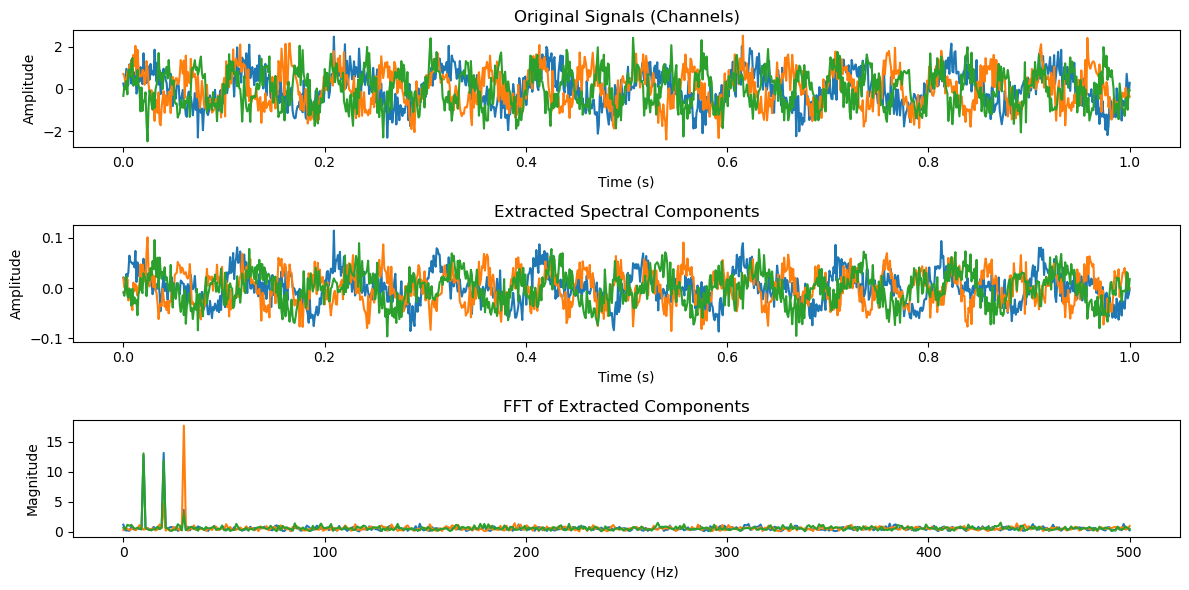

In [6]:
import numpy as np
import matplotlib.pyplot as plt

# Generate synthetic data
np.random.seed(42)
n_channels = 3
n_samples = 1000
t = np.linspace(0, 1, n_samples)
x = np.array([
    np.sin(2 * np.pi * 10 * t) + 0.5 * np.random.randn(n_samples),  # Channel 1: 10 Hz sine wave + noise
    np.sin(2 * np.pi * 20 * t) + 0.5 * np.random.randn(n_samples),  # Channel 2: 20 Hz sine wave + noise
    np.sin(2 * np.pi * 30 * t) + 0.5 * np.random.randn(n_samples)   # Channel 3: 30 Hz sine wave + noise
])

# Normalize frequencies by sampling frequency
fs = 1000  # Sampling frequency
fl = 8 / fs  # Lower cutoff frequency (normalized)
fu = 32 / fs  # Upper cutoff frequency (normalized)

#spectral component analysis
y, W, A = spectral_component_analysis_dft(x, fl, fu)

# Plot the results
plt.figure(figsize=(12, 6))

plt.subplot(3, 1, 1)
plt.plot(t, x.T)
plt.title('Original Signals (Channels)')
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')

plt.subplot(3, 1, 2)
plt.plot(t, y.T)
plt.title('Extracted Spectral Components')
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')

plt.subplot(3, 1, 3)
plt.plot(np.linspace(0, fs/2, n_samples//2), np.abs(np.fft.fft(y, axis=1))[:, :n_samples//2].T)
plt.title('FFT of Extracted Components')
plt.xlabel('Frequency (Hz)')
plt.ylabel('Magnitude')

plt.tight_layout()
plt.show()